In [1]:
import nltk
from nltk import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import random
import time

/home/lorrel_plimier/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Sentiment across groups

Based on the accuracy on the annotations data, the Vader sentiment is about 8% more accurate than HuLiu and TextBlob, though it's still only 58% accurate. Below I look at the distribution of the Vader sentiment across the following groups: 

- gender of poster
- gender of responder
- US region of poster
- party of poster
- house vs. senate.

In [2]:
responses = pd.read_csv('../data/resp_smt_gender_state.csv')
responses.head()

,op_id,op_gender,post_id,responder_id,response_text,op_name,op_category,HL_sentiment,V_sentiment,TB_sentiment,last_name,first_name,type,state,region,resp_gender
0,57265377,M,0,Jerry,Protecting birth is not the same as protecting...,Roger Williams,Congress_Republican,-1,-0.7458,-1.3,Williams,Roger,rep,TX,Region6,M
1,57265377,M,0,Andrea,You need to protect children and leave my body...,Roger Williams,Congress_Republican,1,0.3302,0.0,Williams,Roger,rep,TX,Region6,F
2,57265377,M,0,Sherry,Thank you,Roger Williams,Congress_Republican,0,0.3612,0.0,Williams,Roger,rep,TX,Region6,F
3,57265377,M,0,Bob,Thank you Roger,Roger Williams,Congress_Republican,0,0.3612,0.0,Williams,Roger,rep,TX,Region6,M
4,57265377,M,0,Joy,Unwanted pregnancy is a sad and unfortunate si...,Roger Williams,Congress_Republican,0,-0.0821,-0.8,Williams,Roger,rep,TX,Region6,F


In [3]:
# Get a smaller sample of the dataset to debug code.
responses_sm = responses.iloc[np.random.choice(responses.index,10000)]

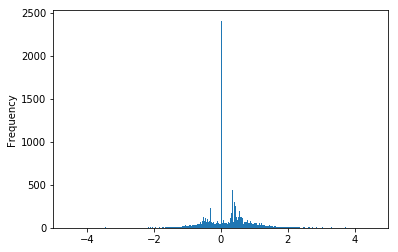

In [10]:
responses_sm['V_sentiment'].plot(kind='hist', bins = 2000, xlim = (-5,5))
plt.show()

The vast majority of the responses have a neutral sentiment, which will provide no signal for any category. What happens if we look just at the positive and negative responses?

In [22]:
resps_nozero = responses[responses['V_sentiment']!=0]

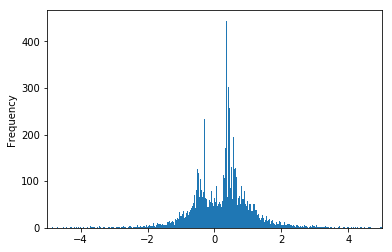

In [20]:
resps_nozero_sm['V_sentiment'].plot(kind='hist', bins = 2000, xlim = (-5,5))
plt.show()

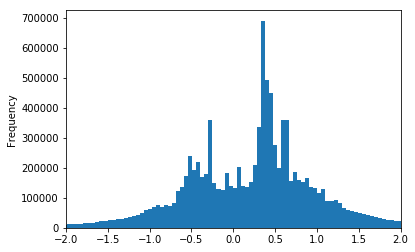

In [29]:
resps_nozero['V_sentiment'].plot(kind='hist', bins = 20000, xlim = (-2,2))
plt.show()

### Gender

Gender of poster:

In [5]:
responses[['V_sentiment','op_gender']].groupby('op_gender').describe()

V_sentiment                                                        \
                count      mean       std       min     25%     50%     75%   
op_gender                                                                     
M          10407276.0  0.157324  1.219696 -474.8580 -0.1280  0.0000  0.5062   
W           3459231.0  0.229978  1.038114 -133.6127 -0.0243  0.1444  0.6090   

                     
                max  
op_gender            
M          489.6000  
W          177.6642

op_gender
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
W    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

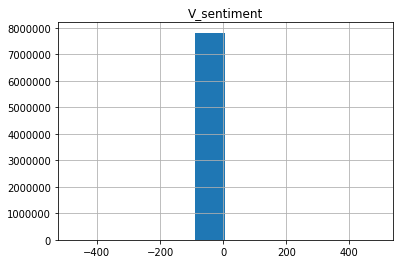

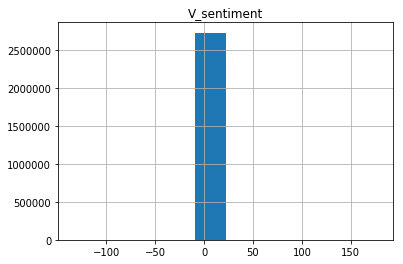

In [30]:
resps_nozero[['V_sentiment','op_gender']].groupby('op_gender').hist()

Gender of responder:

In [6]:
responses[['V_sentiment','resp_gender']].groupby('resp_gender').describe()

V_sentiment                                                        \
                  count      mean       std       min     25%     50%     75%   
resp_gender                                                                     
F             5850849.0  0.234949  1.001474 -286.5280  0.0000  0.1317  0.5994   
M             6892439.0  0.122114  1.257562 -474.8580 -0.2085  0.0000  0.4614   
U             1123219.0  0.192786  1.466376  -86.3136 -0.0375  0.0000  0.5719   

                       
                  max  
resp_gender            
F            205.7187  
M            489.6000  
U            285.9360

Gender of poster and responder:

In [32]:
responses[['V_sentiment','op_gender','resp_gender']].groupby(['op_gender','resp_gender']).describe()

V_sentiment                                          \
                            count      mean       std       min       25%   
op_gender resp_gender                                                       
M         F             4340545.0  0.212591  1.019818 -286.5280 -0.032600   
          M             5243244.0  0.109482  1.307320 -474.8580 -0.219525   
          U              823487.0  0.170623  1.551247  -86.3136 -0.074800   
W         F             1510304.0  0.299205  0.943833  -37.3453  0.000000   
          M             1649195.0  0.162275  1.083326 -133.6127 -0.153100   
          U              299732.0  0.253678  1.200654  -38.1540  0.000000   

                                                 
                          50%     75%       max  
op_gender resp_gender                            
M         F            0.0652  0.5719  205.7187  
          M            0.0000  0.4404  489.6000  
          U            0.0000  0.5267  285.9360  
W         F            0.3182  0.6369   74.1346  
          M            0.0000  0.5574  177.6642  
          U            0.2196  0.6249  107.6702

### Geography

Geographical region of the poster:

![alt text](../data/USFederalRegions.svg)
By Belg4mit - Own work, Public Domain, https://commons.wikimedia.org/w/index.php?curid=10180327

In [7]:
responses[['V_sentiment','region']].groupby('region').describe()

V_sentiment                                                        \
               count      mean       std       min     25%     50%     75%   
region                                                                       
Region1    1275529.0  0.220505  0.947305  -59.4874  0.0000  0.0586  0.5859   
Region10    725847.0  0.217704  1.175687 -107.3215 -0.1258  0.1630  0.6249   
Region2     809414.0  0.148393  1.065395  -47.9203 -0.1449  0.0000  0.5267   
Region3     460432.0  0.181737  1.297688 -125.0970 -0.1155  0.0452  0.5719   
Region4    4428471.0  0.160188  1.370834 -474.8580 -0.1325  0.0000  0.4939   
Region5    1629492.0  0.215716  1.001453  -63.6564 -0.0775  0.1059  0.5914   
Region6    1441290.0  0.164047  1.025072 -190.2528 -0.1280  0.0000  0.5340   
Region7     433672.0  0.159385  1.192217 -133.6127 -0.2338  0.0000  0.5704   
Region8     767329.0  0.236243  1.046989 -105.7965 -0.1019  0.1531  0.6249   
Region9    1895031.0  0.127733  1.134318 -220.2354 -0.0702  0.0000  0.4588   

                    
               max  
region              
Region1    44.9449  
Region10   98.2464  
Region2   121.3920  
Region3    35.8476  
Region4   489.6000  
Region5    51.0956  
Region6    50.5632  
Region7   177.6642  
Region8    56.7788  
Region9   262.7548

### Politics

Political party of the poster:

In [8]:
responses[['V_sentiment','op_category']].groupby('op_category').describe()

V_sentiment                                        \
                           count      mean       std       min     25%   
op_category                                                              
Congress_Democratic    4786769.0  0.198417  1.086955 -190.2528 -0.0569   
Congress_Independent    193088.0  0.112143  0.858130  -33.4858 -0.2168   
Congress_Republican    8886650.0  0.164452  1.228971 -474.8580 -0.1280   

                                                
                         50%     75%       max  
op_category                                     
Congress_Democratic   0.0772  0.5848  177.6642  
Congress_Independent  0.0000  0.4404   25.3190  
Congress_Republican   0.0000  0.5106  489.6000

Legislative body of the poster (House of Representatives vs. Senate):

In [9]:
responses[['V_sentiment','type']].groupby('type').describe()

V_sentiment                                                           
           count      mean       std      min     25%  50%     75%      max
type                                                                       
rep    6308426.0  0.170939  1.084365 -222.792 -0.1027  0.0  0.5574  489.600
sen    7558081.0  0.179213  1.249822 -474.858 -0.1027  0.0  0.5267  285.936